# Google Generative AI

## ChatGoogleGenerativeAI

Nhập lớp `ChatGoogleGenerativeAI` từ gói `langchain_google_genai`.

Lớp `ChatGoogleGenerativeAI` được sử dụng để triển khai các hệ thống AI đàm thoại (conversational AI systems) sử dụng các mô hình Generative AI của Google. Thông qua lớp này, người dùng có thể tương tác với mô hình AI đàm thoại của Google. Các cuộc trò chuyện với mô hình diễn ra ở định dạng trò chuyện (chat format), và mô hình tạo ra các phản hồi phù hợp dựa trên đầu vào của người dùng (user input).

Vì lớp `ChatGoogleGenerativeAI` được tích hợp với framework LangChain, nó có thể được sử dụng cùng với các thành phần LangChain khác.

Để biết thông tin về các mô hình được hỗ trợ, hãy xem: [https://ai.google.dev/gemini-api/docs/models/gemini?hl=en](https://ai.google.dev/gemini-api/docs/models/gemini?hl=en)


In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv(override=True, dotenv_path="../.env")

# Create an instance of ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Pass the prompt to generate an output
answer = llm.stream("Please explain about Langchain(in three lines)")

# Print the result
for token in answer:
    print(token.content, end="", flush=True)

LangChain is a framework for developing applications powered by large language models (LLMs).  It simplifies the process of chaining together LLMs with other tools and data sources. This enables more complex and useful applications beyond simple prompt-response interactions.

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import PromptTemplate

# Create an instance of ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Create a prompt
prompt = PromptTemplate.from_template("Answer with Yes or No. Is {question} a fruit?")

# Create the chain
chain = prompt | model

# Print the result
response = chain.invoke({"question": "Apple"})
print(response.content)

Yes


## Safety Settings

Các mô hình Gemini có cài đặt an toàn mặc định có thể được ghi đè. Nếu bạn nhận được nhiều "Safety Warnings" từ các mô hình của mình, bạn có thể thử điều chỉnh thuộc tính `safety_settings` của mô hình. Ví dụ: để tắt chặn an toàn đối với nội dung nguy hiểm, bạn có thể xây dựng LLM của mình như sau:



In [4]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

# Create an instance of ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    safety_settings={
        # Set threshold levels for blocking harmful content.
        # In this case, the settings indicate not to block harmful content. (However, there could still be basic blocking.)
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

response = llm.invoke("Please explain about Gemini model")
print(response.content)

Gemini is Google's large multimodal AI model.  It's designed to understand and generate various forms of information, including text, code, audio, and images.  Unlike many models that excel in one area, Gemini aims for a high level of competence across multiple modalities, making it a more general-purpose AI.

Here's a breakdown of key aspects:

* **Multimodality:** This is its defining feature. Gemini can process and generate content across different modalities, seamlessly integrating them.  For example, it might answer a question by combining information from an image and text.  This contrasts with models primarily focused on text (like many LLMs) or images (like some image generation models).

* **Large Language Model (LLM) Capabilities:**  At its core, Gemini is built upon a powerful LLM. This allows it to perform tasks like text generation, translation, summarization, question answering, and more, similar to other large language models.  However, its multimodal nature enhances the

## Streaming and Batching

`ChatGoogleGenerativeAI` natively supports streaming and batching. Below is an example.

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Use the llm.batch() method to request multiple queries at once
for chunk in llm.stream("Can you recommend 5 travel destinations in California?"):
    print(chunk.content)
    print("---")

California
---
 offers a vast array of destinations. Here are 5 diverse recommendations, catering to
---
 different interests:

1. **Yosemite National Park (Nature & Hiking
---
):** Iconic granite cliffs, giant sequoia trees, waterfalls, and challenging hikes make this a classic California experience.  Best for those who enjoy outdoor activities and
---
 stunning natural beauty.

2. **San Francisco (City & Culture):** A vibrant city with iconic landmarks like the Golden Gate Bridge, Alcatraz Island,
---
 and cable cars. Offers a blend of history, culture, diverse food scenes, and a unique atmosphere. Best for city lovers and those interested in history and architecture.

3. **Santa Barbara (Beach & Relaxation):** A charming coastal
---
 city with beautiful beaches, Spanish architecture, and a relaxed atmosphere. Perfect for those seeking a more laid-back vacation with opportunities for sunbathing, surfing, and exploring a picturesque town.

4. **Joshua Tree National Park (Desert &
---


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Use the llm.batch() method to request multiple queries at once
results = llm.batch(
    [
        "What is the capital of the United States?",
        "What is the capital of South Korea?",
    ]
)

for res in results:
    print(res.content)

The capital of the United States is **Washington, D.C.**
Seoul


## Multimodeal Model

Để cung cấp một hình ảnh, hãy truyền một tin nhắn từ người dùng với nội dung kiểu `List[dict]`, trong đó mỗi dict chứa một giá trị hình ảnh (kiểu `image_url`) hoặc một giá trị văn bản (kiểu text). Giá trị của `image_url` có thể là bất kỳ điều nào sau đây:

- Một URL hình ảnh công khai (public image URL)
- Một tệp gcs có thể truy cập (ví dụ: "gcs://path/to/file.png")
- Một đường dẫn tệp cục bộ (local file path)
- Một hình ảnh được mã hóa base64 (ví dụ: `data:image/png;base64,abcd124`)
- Một hình ảnh PIL (PIL image)



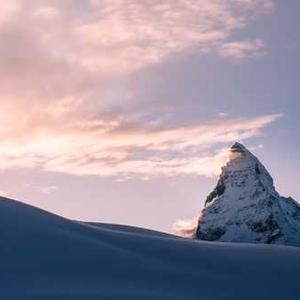

In [7]:
# CASE - A pulbic image URL
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [8]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# The content is provided as a list, which can include both text and an image URL object
message = HumanMessage(
    content=[
        {"type": "text", "text": "What's in this image?"},
        {"type": "image_url", "image_url": image_url},
    ]
)

response = llm.invoke([message])
print(response.content)

That's a picture of the Matterhorn mountain in the Swiss Alps.  The photo shows the iconic pyramidal peak covered in snow, set against a dramatic, soft-colored sunset or sunrise sky.  The foreground features a gently sloping, snow-covered landscape.
